# Dataset: [Crime In Baltimore](https://www.kaggle.com/datasets/sohier/crime-in-baltimore)

## About Dataset
This dataset provides information about the crimes commited in Baltimore city. This dataset is accessible from the link provided above. The dataset covers crimes commited in the city between the years 2016-2020.

This project consists of _ parts:
1. Introduction
2. Data Cleaning
3. Data visualization
4. Data Preprocessing
. . .
5. Conclusion

# 1. Introduction

This data consists of total 15 columns and 2,76,529 observations.

## Attribute description:
* **CrimeDate:** Date of committed crime
* **CrimeTime:** Time of Committed crime
* **CrimeCode:** A unique code assigned to crime based of crime type and weapon used
* **Location:** Location of commited crime
* **Inside/Outside:** Flag shows whether crime was commited inside the house or not
* **Weapon:** Description of weapon used in crime
* **Post:**
* **District:** District of location of committed crime
* **Neighbourhood:**
* **Longitude:** longitude of location of committed crime
* **Latitude:** latitude of location of committed crime
* **Location 1:** tuple of consisting longitude and latitude
* **Primise:**
* **Total incidents:**


## **Let's look at the dataset**

In [2]:
# import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Here, we'll be using cleaned dataset for EDA

In [ ]:
df = pd.read_csv("drive/My Drive/Colab Notebooks/data/cleaned_crime_in_baltimore.csv")
df.head()

,Unnamed: 0,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Longitude,Latitude,Premise
0,0,09/02/2017,23:30:00,3JK,4200 AUDREY AVE,ROBBERY - RESIDENCE,I,KNIFE,913.0,SOUTHERN,Brooklyn,-76.60541,39.22951,ROW/TOWNHO
1,1,09/02/2017,23:00:00,7A,800 NEWINGTON AVE,AUTO THEFT,O,NO WEAPON,133.0,CENTRAL,Reservoir Hill,-76.63217,39.31360,STREET
2,2,09/02/2017,22:53:00,9S,600 RADNOR AV,SHOOTING,O,FIREARM,524.0,NORTHERN,Winston-Govans,-76.60697,39.34768,Street
3,3,09/02/2017,22:50:00,4C,1800 RAMSAY ST,AGG. ASSAULT,I,OTHER,934.0,SOUTHERN,Carrollton Ridge,-76.64526,39.28315,ROW/TOWNHO
4,4,09/02/2017,22:31:00,4E,100 LIGHT ST,COMMON ASSAULT,O,HANDS,113.0,CENTRAL,Downtown West,-76.61365,39.28756,STREET


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


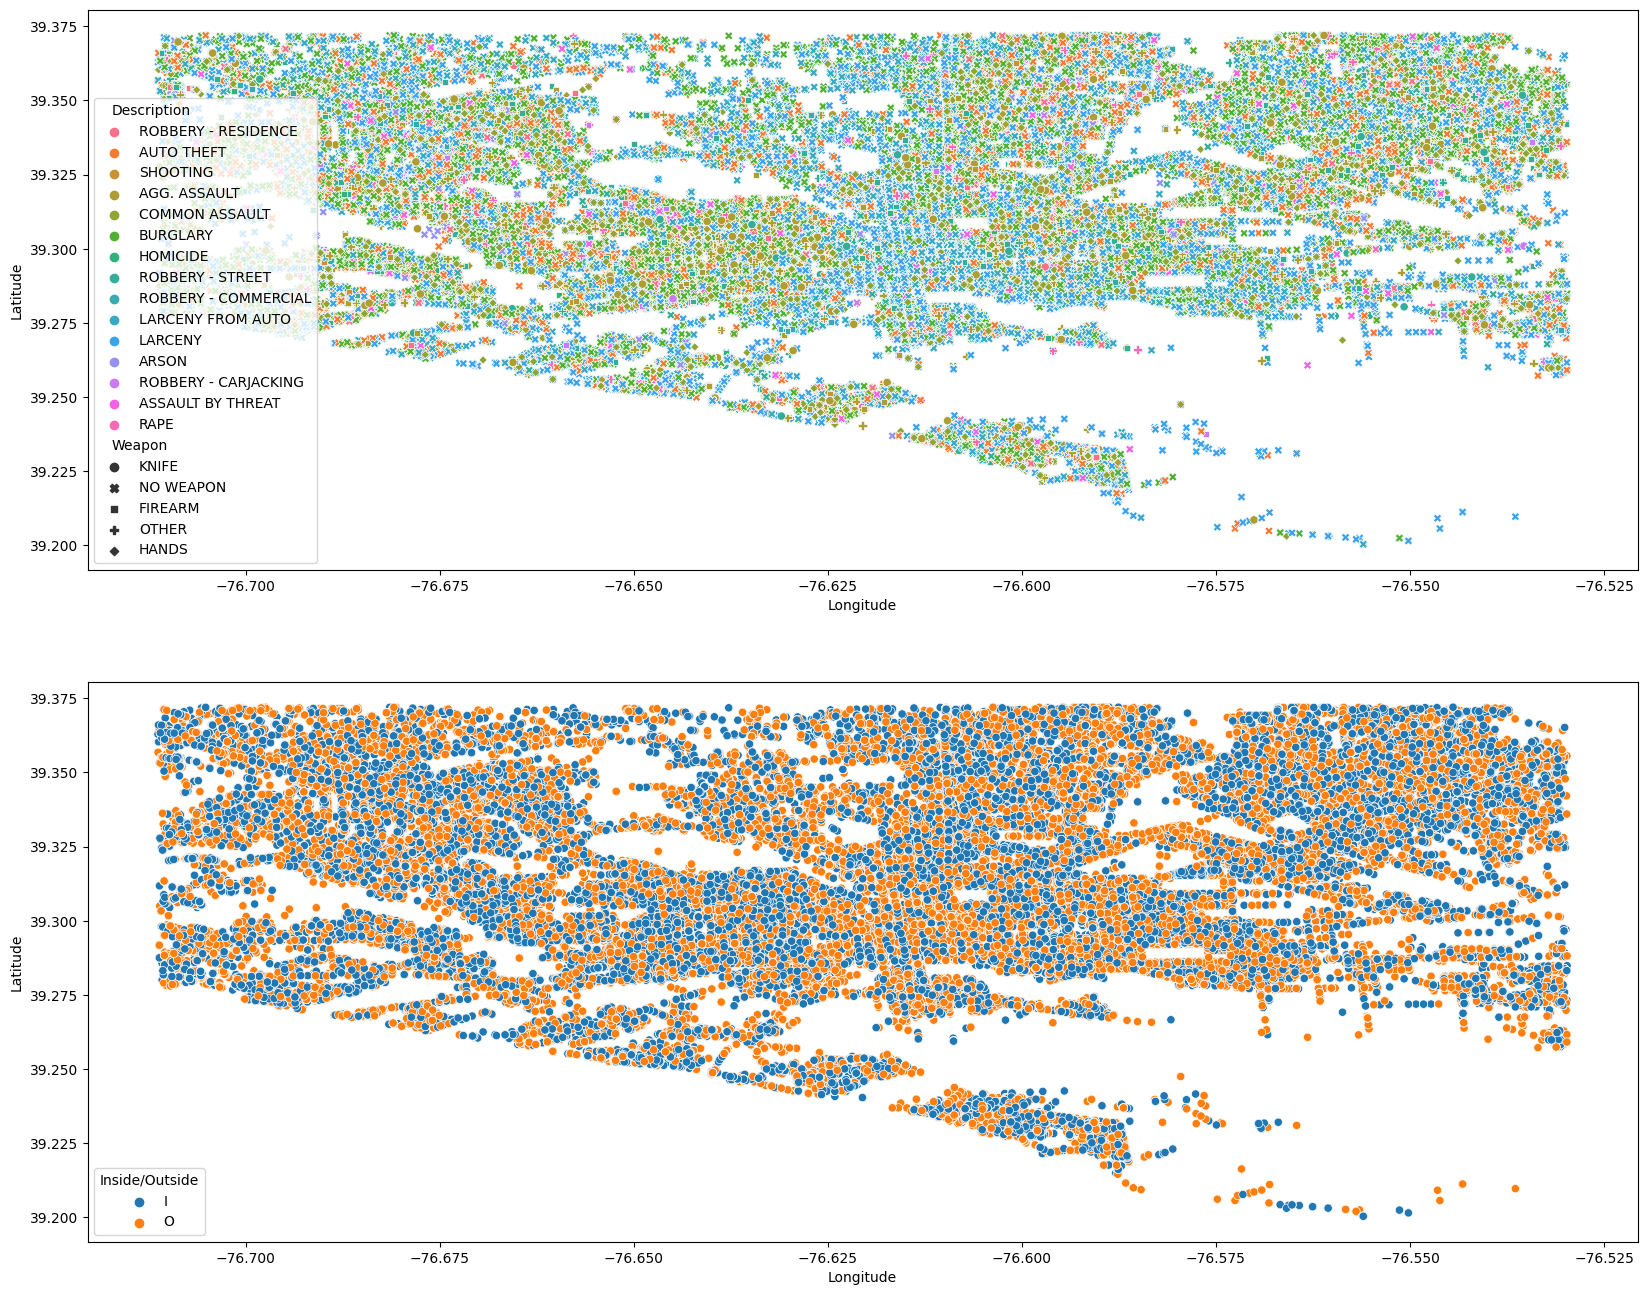

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(20,16))
sns.scatterplot(y=df['Latitude'], x = df['Longitude'], hue = df['Description'], style=df['Weapon'], ax = ax[0])
# sns.scatterplot(y=df['Latitude'], x = df['Longitude'], hue = df['Weapon'], ax = ax[1])
sns.scatterplot(y=df['Latitude'], x = df['Longitude'], hue = df['Inside/Outside'], ax = ax[1])
fig.show()

This plot shows the location of Crime description in Baltimore. We can infer what type of crime is prevalent in which area and what types of weapons are used.

We can see Larceny is more prevalent in central Baltimore while Robbery and Burglary is in Northern and Western Baltimore.

Crime location regarding Inside/Outside is uniformly distributed.

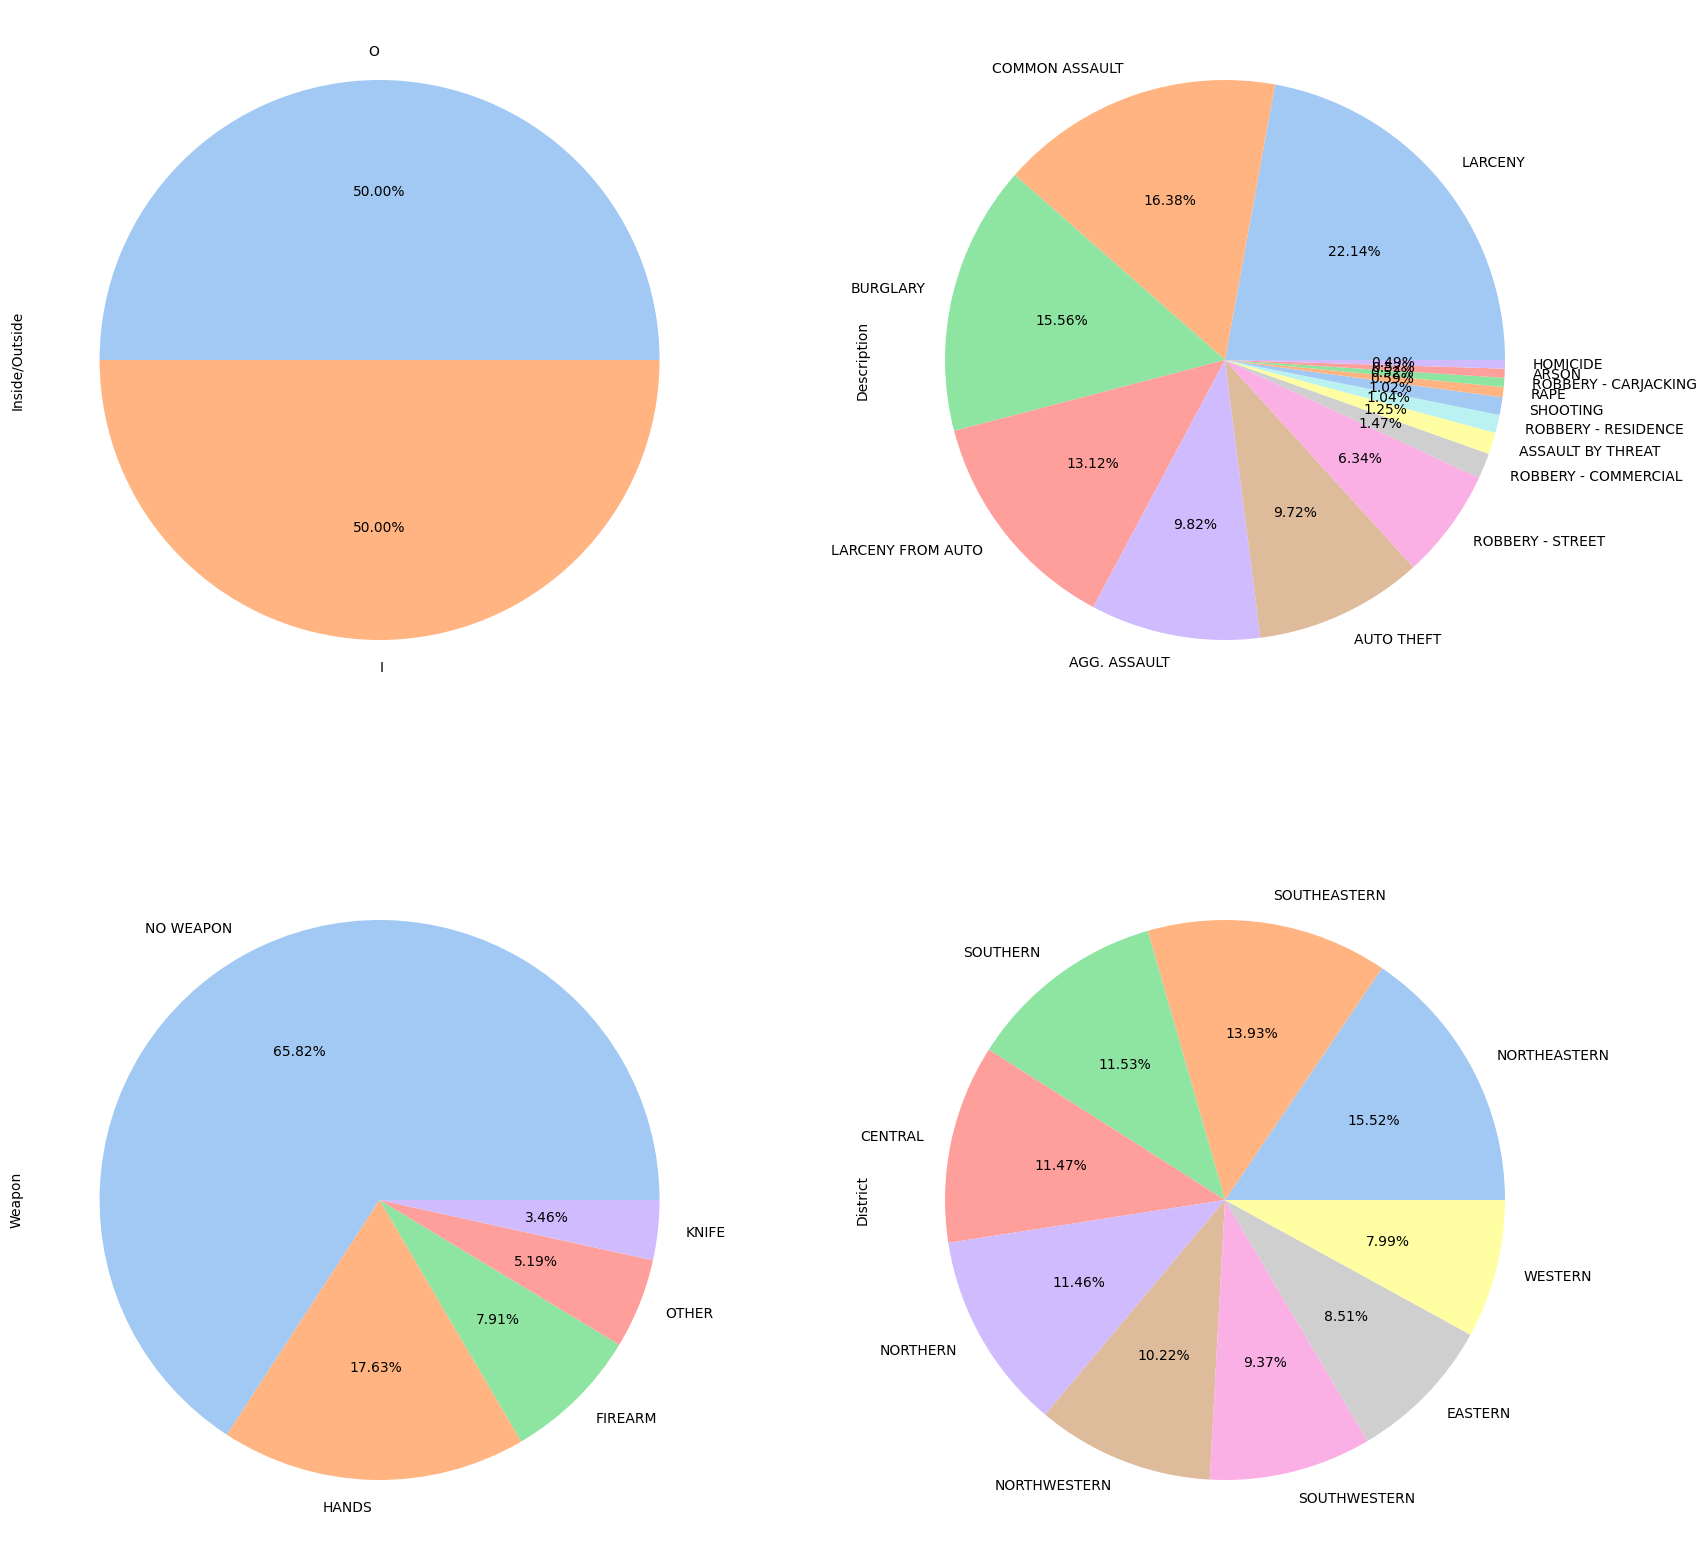

In [ ]:
fig, ax = plt.subplots(2,2, figsize=(20,20))
ax = ax.ravel()

crimeLoc = df['Inside/Outside'].value_counts()
piec_colors = sns.color_palette('pastel')[0:len(crimeLoc)]
crimeLoc.plot(kind = 'pie', colors=piec_colors, autopct='%1.2f%%', ax=ax[0])

crimeDescription = df.Description.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(crimeDescription)]
crimeDescription.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax = ax[1])

weaponUsed = df.Weapon.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(weaponUsed)]
weaponUsed.plot(kind = 'pie', colors=piec_colors, autopct = '%1.2f%%', ax=ax[2])

district = df.District.value_counts()
piec_colors = sns.color_palette('pastel')[0:len(district)]
district.plot(kind='pie', colors=piec_colors, autopct ='%1.2f%%', ax=ax[3])
fig.show()

The first pie chart shows whether a crime was commited outside(on road) or inside (within house/ building). After data cleaning, the dataset has perfect division of crimes inside and outside.

The second pie chart describes the count of crimes using crime description. Major crimes are described as Larceny, Burglary and Assault.

The third pie chart describes the count of crimes using type of weapons used. In most of the crimes, either their is no weapon used or they are committed by hands.

The fourth pie chart describes the count of crimes using District Division. The crime rate is least in Western and Southern Baltimore.

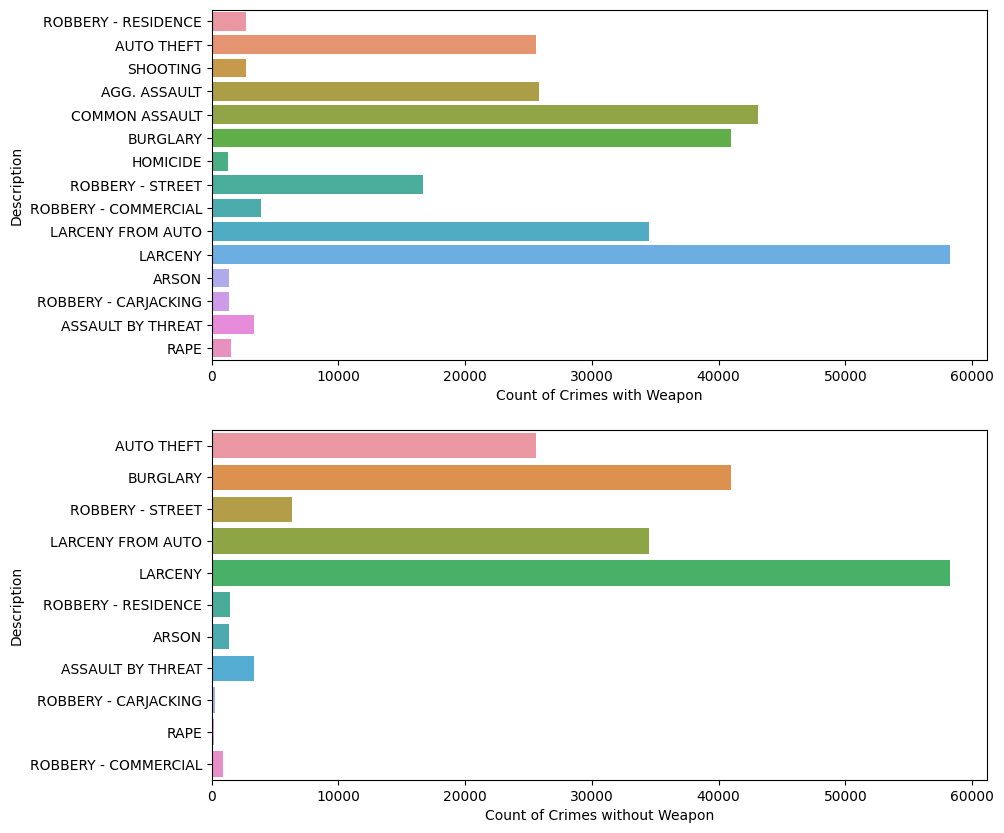

In [ ]:
#Show this to prove that null values = no weapons used. This has already been proved before in data cleaning, here is a visual representation.
fig, ax = plt.subplots(2,1)
sns.countplot(y = df['Description'], ax = ax[0]).set_xlabel('Count of Crimes with Weapon')
dfNull = df[df['Weapon']=="NO WEAPON"]
sns.countplot(y= dfNull['Description'], ax = ax[1]).set_xlabel('Count of Crimes without Weapon')
fig.set_size_inches(10,10)
fig.show()

It is reasonable to assume that null values for weapons indicate that there was no use of a weapon when comparing the two categories of crimes committed with and without weapons. Let's substitute "NO WEAPON" for the nulls.

To find relations with CrimeTime, time needs to be striped into hours, mins and date into year, month, and weekday.

In [ ]:
df['CrimeTime'] = df['CrimeTime'].str.replace('24:00:00', '00:00:00')

In [ ]:
df['Date'] = df['CrimeDate'] + ' ' + df['CrimeTime']
df['Date'] = pd.to_datetime(df['Date']) #Converting to pandas datetime so that it can be split easily.

In [ ]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['Weekday'] = df['Date'].dt.weekday + 1 #To convert to 1-based indexing
df['Hour'] = df['Date'].dt.hour

In [ ]:
df = df.drop(['CrimeDate', 'CrimeTime'], axis = 1)

In [ ]:
df = df.set_index('Date')

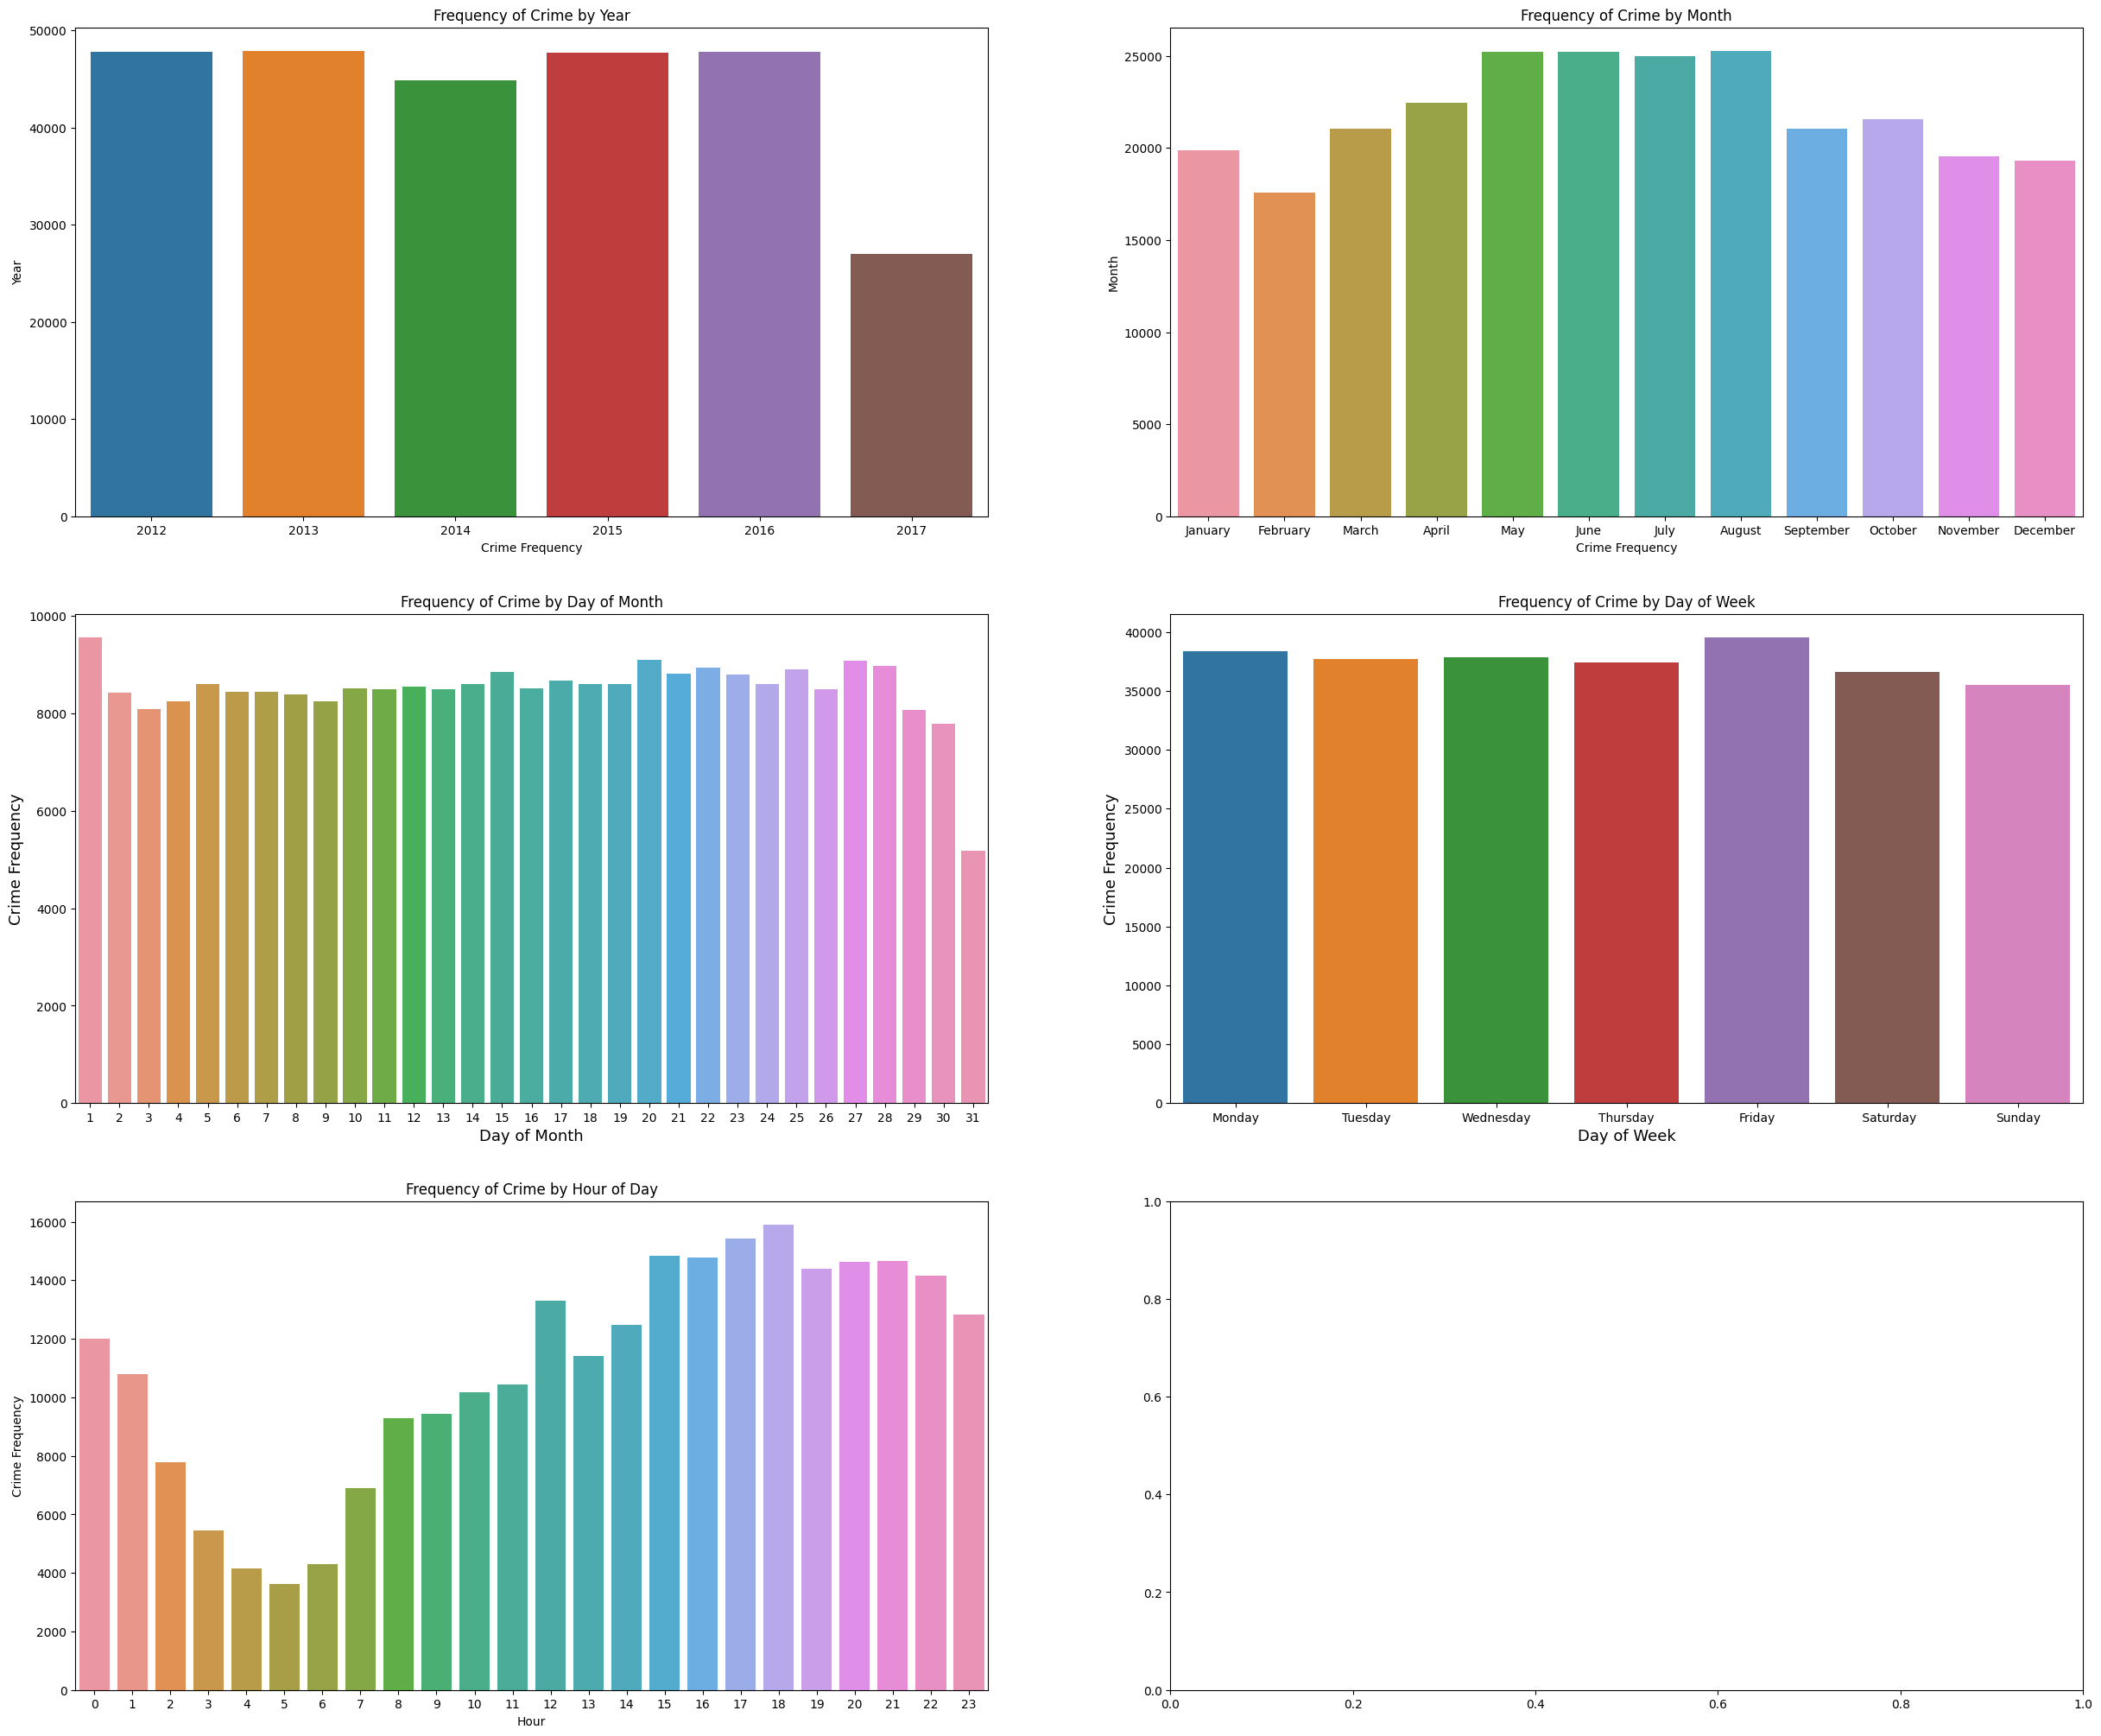

In [ ]:
fig, ax = plt.subplots(3, 2, figsize=(30,25))
ax = ax.ravel()

ax[0].set_title('Frequency of Crime by Year')
fig1 = sns.countplot(x = 'Year', data = df, ax=ax[0])
fig1.set_xlabel('Crime Frequency')
fig1.set_ylabel('Year')


ax[1].set_title('Frequency of Crime by Month')
fig2 = sns.countplot(x = 'Month', data = df, ax=ax[1])
labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
fig2.set_xticklabels(labels)
fig2.set_xlabel('Crime Frequency')
fig2.set_ylabel('Month')

ax[2].set_title('Frequency of Crime by Day of Month')
fig3 = sns.countplot(x = 'Day', data = df, ax=ax[2])
fig3.set_ylabel("Crime Frequency", fontsize=13)
fig3.set_xlabel('Day of Month', fontsize=13)

ax[3].set_title('Frequency of Crime by Day of Week')
fig3 = sns.countplot(x = 'Weekday', data = df, ax=ax[3])
fig3.set_ylabel("Crime Frequency", fontsize=13)
fig3.set_xlabel('Day of Week', fontsize=13)
labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',' Saturday', 'Sunday']
fig3.set_xticklabels(labels)

ax[4].set_title('Frequency of Crime by Hour of Day')
fig4 = sns.countplot(x = 'Hour', data = df, ax=ax[4])
fig4.set_ylabel("Crime Frequency")
fig4.set_xlabel('Hour')

fig.show()

The first bar graph shows frequency of crime by year. The crime rate is almost constant for each year. The dip is the year 2017 is mostly due to incomplete data for the rest of the year.

The second bar graph shows frequency of crime by month. The crime rate is relatively high in the middle months of the year.

The third bar graph shows frequency of crime by day of month.The crime rate is same throughout every days of the month, we can see a relative dip at the end of the month.

The fourth bar graph shows frequency of crime by day of week. The crime rate is unifoem for every day of the week.  

The fifth bar graph shows frequency of crime by hour of day. The crime rate is low at midnight and early morning hours.

In [ ]:
Description_list = df.Description.unique()

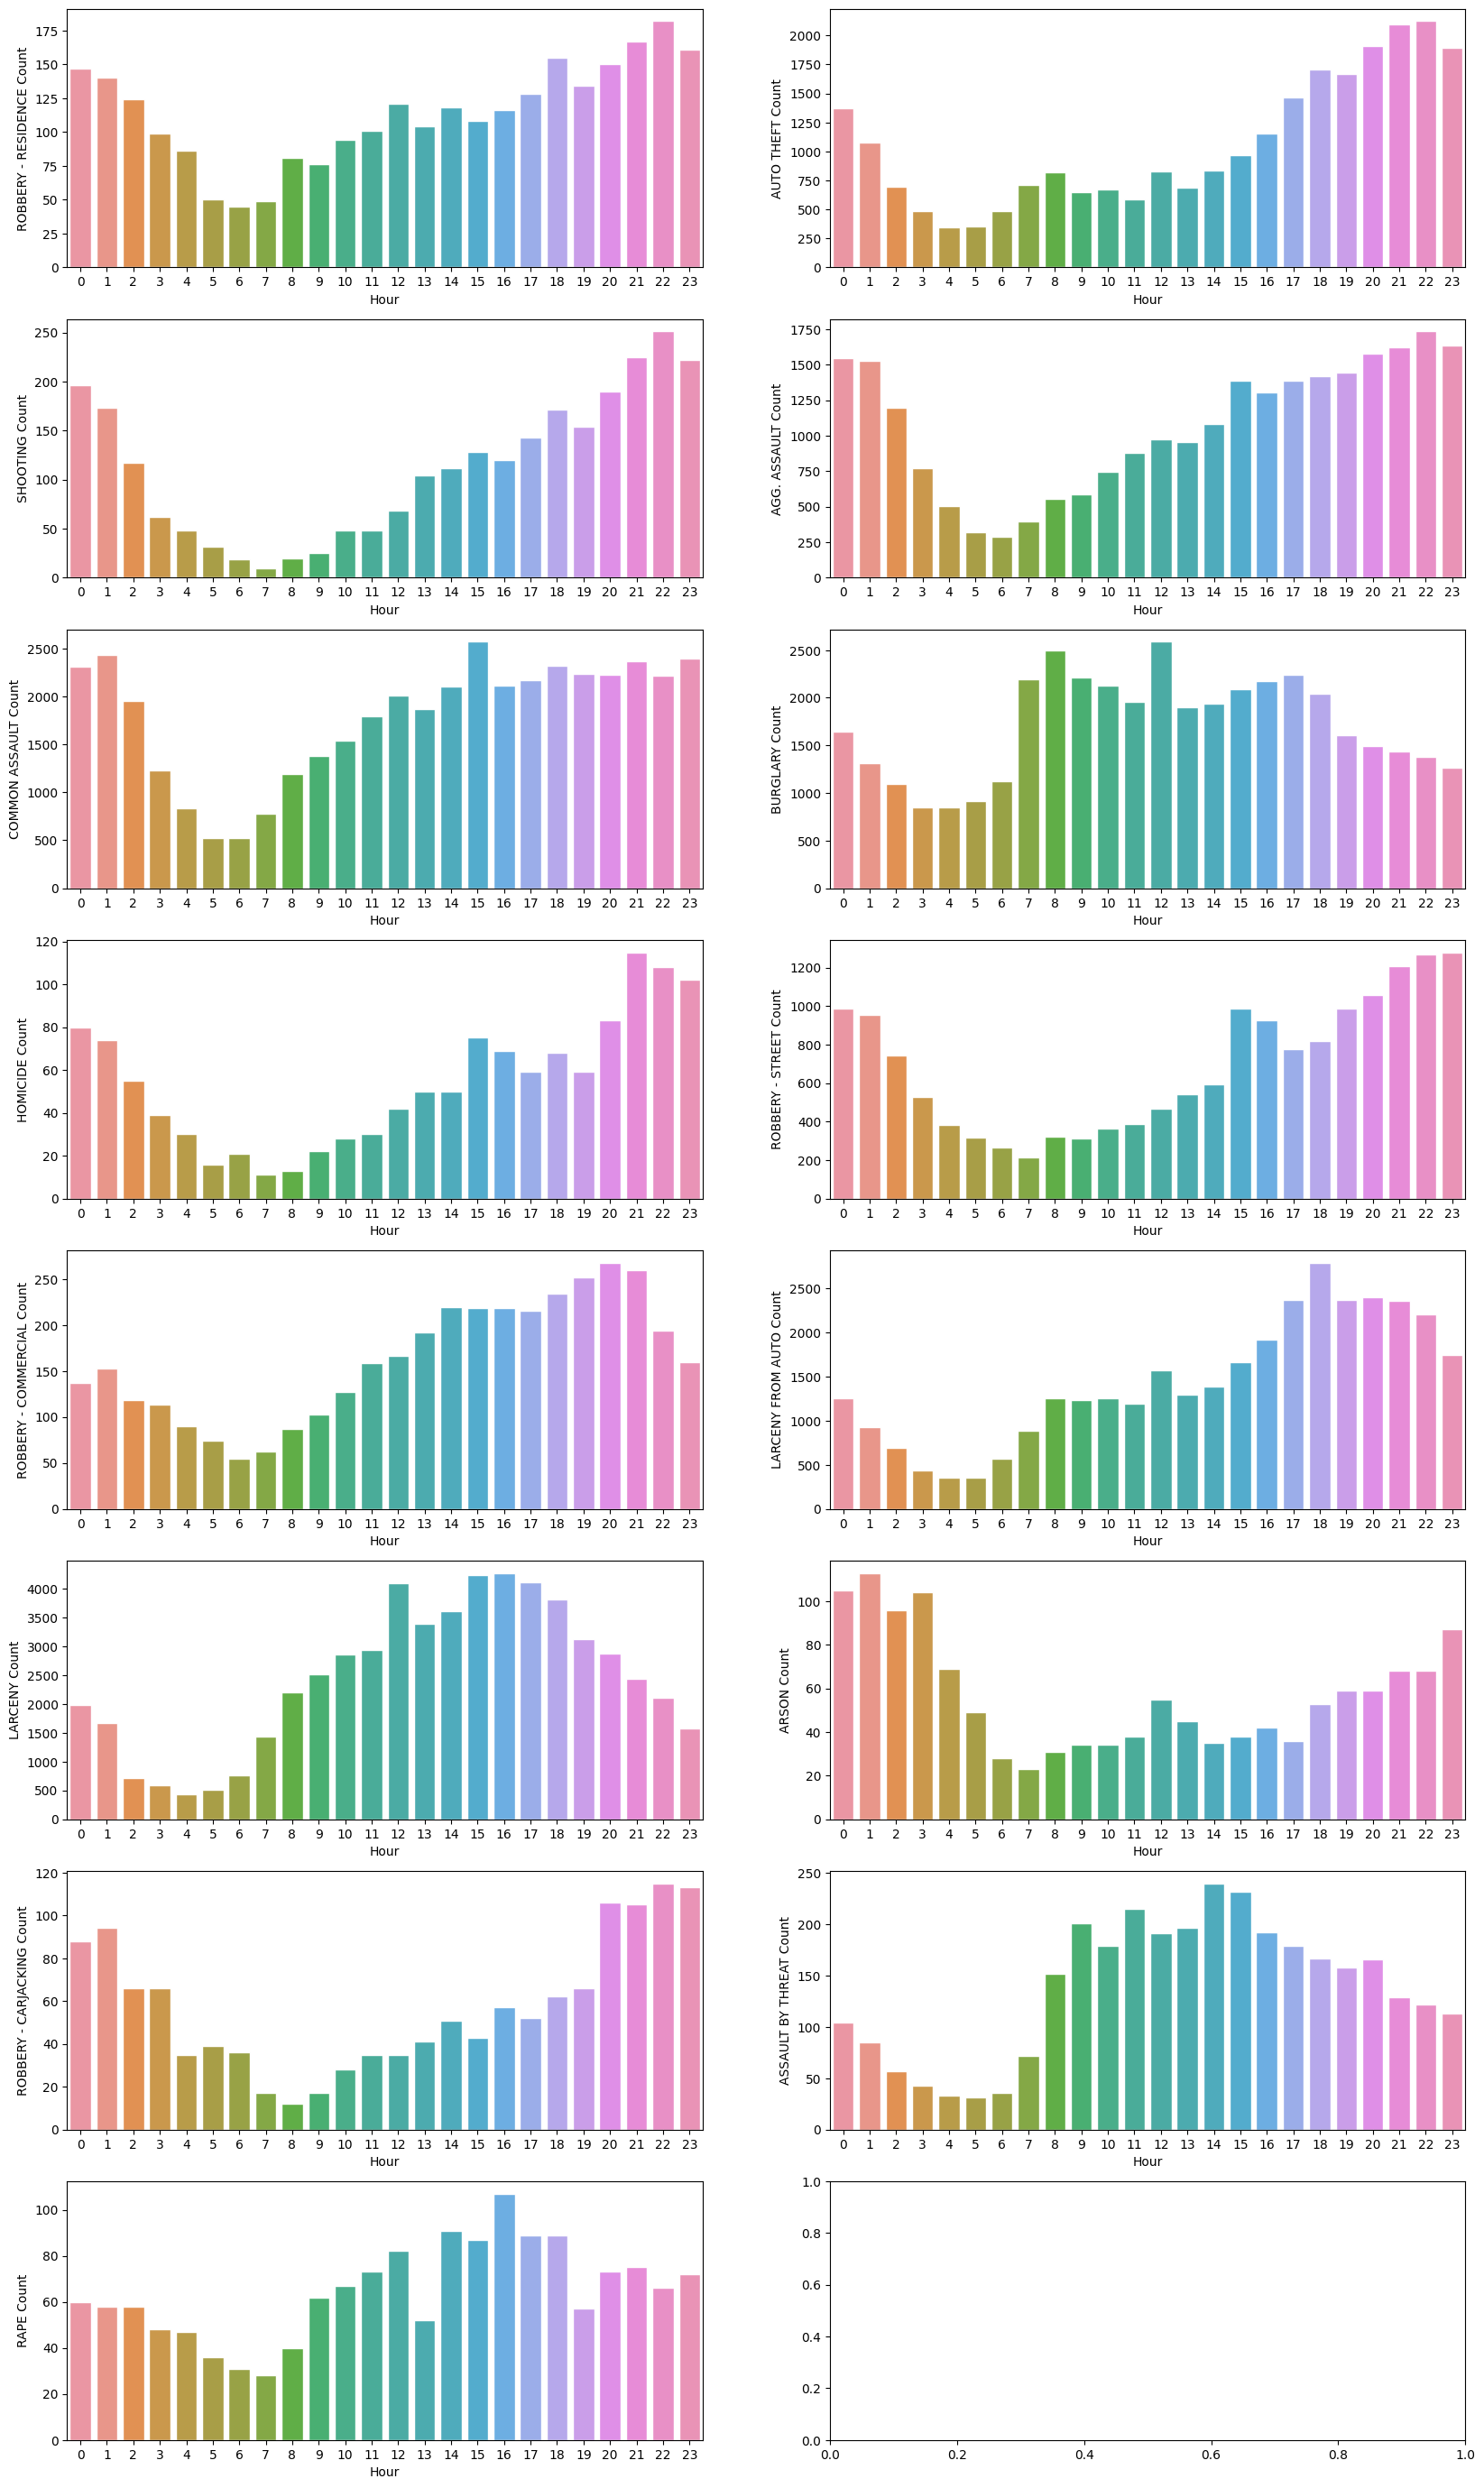

In [ ]:
fig,ax = plt.subplots(8,2, figsize=(20,35))

ax=ax.ravel()
sns.set_theme(style='whitegrid')
for axid,col in enumerate(Description_list):
    sns.countplot(x= 'Hour', data = df[df.Description==col] , ax=ax[axid]).set_ylabel(col + ' Count')

The graphs describe different crime description count by hour of day. Larceny, Robbery, Burglary, Assault and Rape related crimes are more during mid-day time, while rest crimes are more during mid-night time.

In [ ]:
import folium
from folium.plugins import HeatMap

In [ ]:
# help(folium)

In [ ]:
df['Latitude'].median()

39.30368

In [ ]:
df['Longitude'].median()

-76.61401

In [ ]:
def createMap(defaultLocation = [39.30368, -76.61401], defaultZoomStart = 12):
    defMap = folium.Map(location = defaultLocation, control_scale = True, tiles="Stamen Toner", zoom_start = defaultZoomStart)
    return defMap

In [ ]:
map = createMap()

In [ ]:
df['count'] = 1

In [ ]:
df_murder = df[df['Description'] == 'HOMICIDE']

In [ ]:
HeatMap(
        data = df_murder[['Latitude', 'Longitude', 'count']].groupby(
            ['Latitude', 'Longitude']).sum().reset_index().values.tolist(),
        radius = 8,
        max_zoom = 13).add_to(map)
map

# 3. Modeling


### What are we going to predict ?

Based on the following attributes we are going to predict time at which it is not safe to go out in that locality.

*   Crime Description
*   Weapon type
*   Crime category(inside/outside)
*   Crime district

### Model Type

* We are going to use XGB(eXtreme Gradient Boosting) regression as regression technique.
* XGBoost is a machine learning algorithm that uses an ensemble of decision trees and gradient boosting to make predictions.


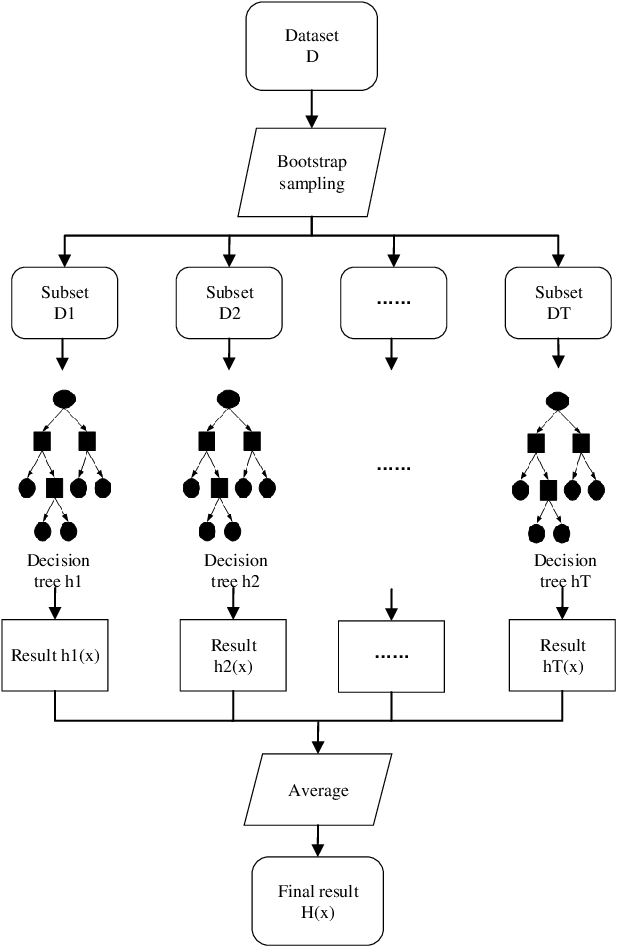

In [4]:
# importing pre-processed csv file
df = pd.read_csv("drive/My Drive/Colab Notebooks/data/preprocessed.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,CrimeDate,CrimeTime,CrimeCode,Location,Description,Inside/Outside,Weapon,Post,District,Neighborhood,Premise,Location 1
0,1,1,1472,1380,61,22481,4,2,4,9,1,215,106,52656
1,3,3,1472,1370,40,5265,1,1,5,121,7,38,96,15312
2,4,4,1472,1351,42,932,6,2,2,3,1,64,106,21549
3,5,5,1472,1320,44,23781,5,1,4,116,7,46,96,3482
4,8,8,1472,1260,40,7536,1,2,5,82,5,268,106,52781


In [5]:
# Make dataframe for all the training features
newdata = df[["Description" , "District" , "Inside/Outside" , "Weapon"]]

In [6]:
# import train_test_spilt to spilt the dataset for training and testing
# import GridSearchCV to find the best fitted parameters for our traing model
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost import XGBRegressor

In [ ]:
# Split dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(newdata, df["CrimeTime"], random_state=42, test_size=0.20)

In [ ]:
# import StandardScaler to resize the distribution values, so that the mean of the obsereved value becomes 0 and standard deviation becomes 1.
# To normalize the data
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalize X_train and X_test
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled.shape, X_test_scaled.shape

((172313, 4), (43079, 4))

In [ ]:
# Regression model - RXGBRegressor
xgbr = XGBRegressor()
parameters = {'n_estimators': list(range(10,800,100)), 'learning_rate' : [0.001, 0.01, 0.1]}

XGB_regressor = GridSearchCV(xgbr, parameters, n_jobs=20, verbose=0)
XGB_regressor.fit(X_train_scaled, list(y_train))

best_model = XGB_regressor.best_estimator_

y_train_predicted = best_model.predict(X_train_scaled)
train_rmse = np.sqrt(mean_squared_error(list(y_train), y_train_predicted))
train_mae = mean_absolute_error(list(y_train), y_train_predicted)

print("Training root mean sqaure error is " , train_rmse )
print("Training mean absolute error is " , train_mae )
print("Best parameters are " , XGB_regressor.best_params_)

y_predicted = best_model.predict(X_test_scaled)
test_rmse = np.sqrt(mean_squared_error(list(y_test), y_predicted))
test_mae = mean_absolute_error(list(y_test), y_predicted)

print("Test root mean sqaure error is " , test_rmse )
print("Test mean absolute error is " , test_mae )


Training root mean sqaure error is  393.70371849324465
Training mean absolute error is  326.0538761342388
Best parameters are  {'learning_rate': 0.01, 'n_estimators': 610}
Test root mean sqaure error is  393.3545729900137
Test mean absolute error is  325.0945343249228
